In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=fd8fcd0eb7788a0e3413f34ba5273e6a5bed0eaa95266dfc264894f8e99ad723
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
import glob
fn = glob.glob("/gdrive/My Drive/face_samples/*")
fn

['/gdrive/My Drive/face_samples/Eason.jpg',
 '/gdrive/My Drive/face_samples/Yui.jpg',
 '/gdrive/My Drive/face_samples/Jay.jpg',
 '/gdrive/My Drive/face_samples/Chiling.jpeg']

128維度: [array([-0.02564107,  0.08498923,  0.020455  , -0.02350171, -0.05263893,
       -0.09514996, -0.02561824, -0.17431539,  0.14165166, -0.05724549,
        0.24896564, -0.04762724, -0.18163162, -0.11478807,  0.01795488,
        0.13749102, -0.18775229, -0.17604323, -0.0314597 ,  0.01616143,
        0.05478758,  0.0004843 ,  0.05070018,  0.0450923 , -0.0875807 ,
       -0.29908967, -0.13867798,  0.00725366,  0.09527826, -0.08004462,
       -0.04427686,  0.12566312, -0.22152995, -0.08484612,  0.06652327,
        0.10494745,  0.04080843, -0.09563795,  0.21638834, -0.02474606,
       -0.2363147 ,  0.04829086,  0.03381364,  0.28867954,  0.22031188,
       -0.01731834, -0.01122001, -0.14745007,  0.06181014, -0.08965719,
        0.05421295,  0.16187544,  0.09270723,  0.02124511, -0.05676059,
       -0.15803193,  0.00973155,  0.13622738, -0.14537312, -0.03574172,
        0.13393936, -0.09321009, -0.02323435, -0.0806638 ,  0.17238083,
        0.03402961, -0.10908692, -0.20101862,  0.0978347

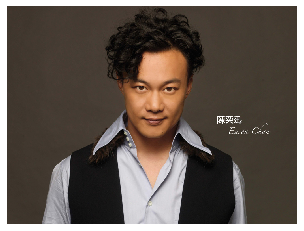

In [0]:
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline

img = fn[0]
img = face_recognition.load_image_file(img)
en = face_recognition.face_encodings(img)[0]

print("128維度:", en)
plt.axis("off")
plt.imshow(img)

In [0]:
import os
os.path.split(fn[0])

('/gdrive/My Drive/face_samples', 'Eason.jpg')

In [0]:
import pandas as pd

en_list = []
name_list = []

for f in fn:
  img = face_recognition.load_image_file(f)
  en = face_recognition.face_encodings(img)[0]
  name = os.path.split(f)[-1].split(".")[0]
  en_list.append(list(en))
  name_list.append(name)

face_df = pd.DataFrame({
    "Name": name_list,
    "Encoding": en_list
})

# df.to_csv("gdrive/My Drive/face.csv",
#           encoding = "utf-8",
#           index = False)

# face_dfpd.read_csv("/gdrive/My Drive/face.csv")

face_df

,Name,Encoding
0,Eason,"[-0.0256410650908947, 0.08498922735452652, 0.0..."
1,Yui,"[-0.0565577857196331, 0.10199764370918274, 0.0..."
2,Jay,"[-0.06316208094358444, 0.17201174795627594, 0...."
3,Chiling,"[-0.04510001465678215, 0.027326639741659164, 0..."


In [0]:
import json
# faces = face_df["Encoding"].apply(lambda x:json.loads(x))
# if we load files from csv files, the Encoding column will be string format
# we need to use json package to convert it to list
faces = list(face_df["Encoding"])
names = list(face_df["Name"])

輸入網址:https://cdn2.ettoday.net/images/3442/d3442120.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


這應該是: Yui
跟 Eason 的距離: 0.6181030688278402
跟 Yui 的距離: 0.41279203167933143
跟 Jay 的距離: 0.6410808017969433
跟 Chiling 的距離: 0.49650620021016223


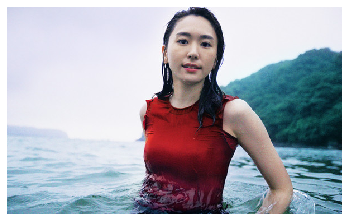

In [0]:
import requests
url = input("輸入網址:")
response = requests.get(url, stream=True, verify=False)
testimg = face_recognition.load_image_file(response.raw)
testen = face_recognition.face_encodings(testimg)[0]
distance = face_recognition.face_distance(testen, faces)

if min(distance) > 0.5:
    print("沒有匹配的人")
else:
    ans = names[distance.argmin()]
    print("這應該是:", ans)
    
for n, d in zip(names, distance):
    print("跟", n, "的距離:", d)
plt.axis("off")
plt.imshow(testimg)